## Import libraries and Dataset

In [1]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('PROJECT FILE STARTS RUNNING!')

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve

import pickle

import warnings
warnings.filterwarnings('ignore')

logger.info('LIBRARIES IMPORTED')

In [3]:
# Importing Data
CC_DF = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
logger.info('DATA IMPORTED AND SAVING INTO PANDAS DATAFRAME!')

## EDA

In [5]:
logger.info('EDA STARTED')

In [6]:
print('Number of Columns - ',len(CC_DF.columns))
print('Names of columns - ',CC_DF.columns)

Number of Columns -  25
Names of columns -  Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


There are 25(including ID) variables:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)


In [7]:
# ID is a uniqe and diffrent for customer to customr, So dropping it
CC_DF.drop('ID',axis=1,inplace=True)

In [8]:
# Lets see the basic information of the data
CC_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

        > All the 24 column contains numbers with data type int or float
        > There are 30000 cutomer data
        > There 0 missing values in the data 

<function matplotlib.pyplot.show(close=None, block=None)>

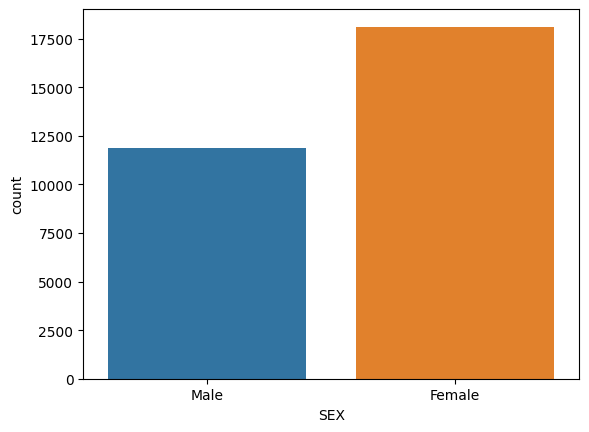

In [9]:
sns.countplot(x=CC_DF['SEX'])
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.show

> Compare to Male Female Creadit card users are more

<function matplotlib.pyplot.show(close=None, block=None)>

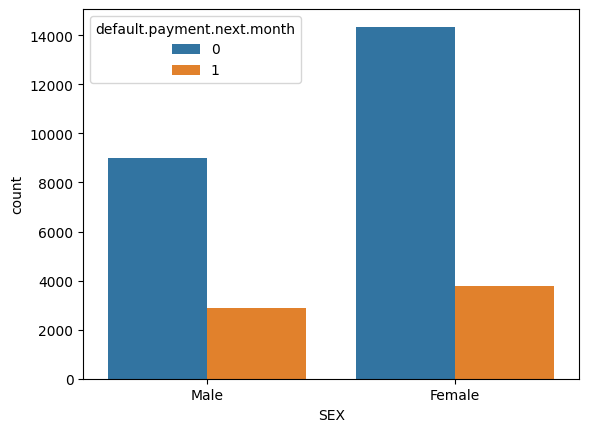

In [10]:
sns.countplot(x=CC_DF['SEX'],hue=CC_DF['default.payment.next.month'])
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.show

> Female are holding more credit cards then male but the defult is low compare to the male defaulters.
> Male are holding less number of card compare to female but the defaulters  rate is high

In [11]:
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
CC_DF['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
# As the marriage status will be married or not and there are 323+54 data which is coming under other, I will convert them to singal(2)
CC_DF['MARRIAGE']=CC_DF['MARRIAGE'].apply(lambda x : 2 if x >2 or x < 1 else x)

CC_DF['MARRIAGE'].value_counts()

<Axes: xlabel='MARRIAGE', ylabel='count'>

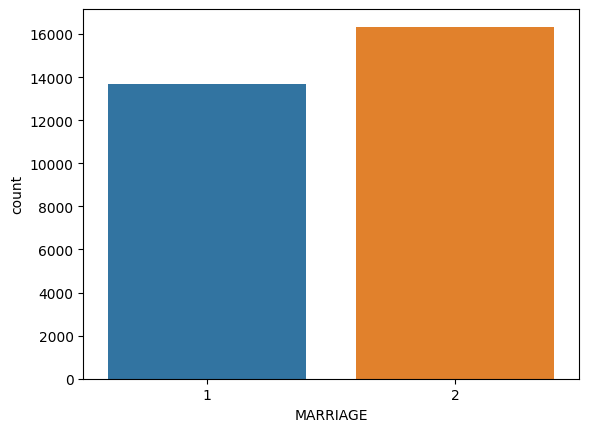

In [13]:
sns.countplot(x=CC_DF['MARRIAGE'])

Now both are almost equl

In [14]:
CC_DF.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
CC_DF['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
# As 5,6,0 are unknown I am consedaring under others
CC_DF['EDUCATION']=CC_DF['EDUCATION'].apply(lambda x : 4 if x >4 or x < 1 else x)

In [17]:
CC_DF['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

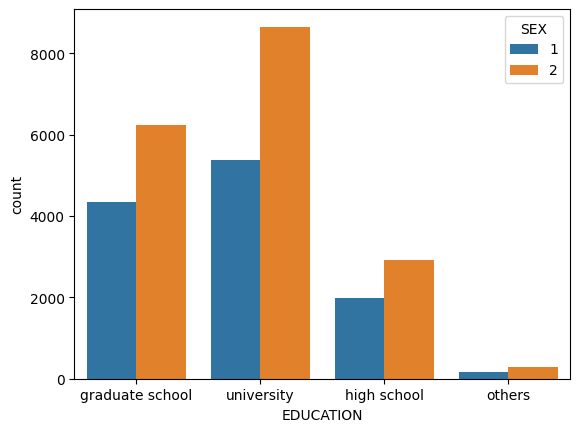

In [18]:
sns.countplot(x=CC_DF['EDUCATION'],hue=CC_DF['SEX'])
plt.xticks(ticks=[0,1,2,3],labels=['graduate school','university','high school','others'])
plt.show

From the above we can under stand Females are more aeducated then males

## Handling Outliers

In [19]:
logger.info('HANDALING OUTLIERS STARTS!')

In [20]:
CC_DF.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Limit Balance Column

skewness -  0.992866960519544


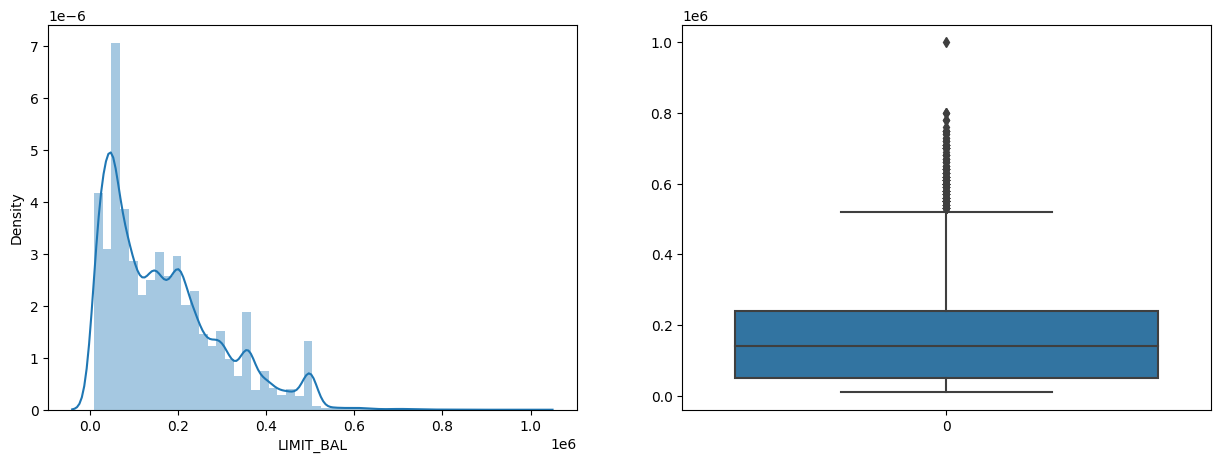

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['LIMIT_BAL'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['LIMIT_BAL'])

plt.show

print('skewness - ',CC_DF['LIMIT_BAL'].skew())

### OBSERVATIONS :
        > Limit balance column is skewed to the left and skewness is near to 1.
        > In box plot we can see there are outliers to be handeled.
        > We will handel the outliers by using quantiles due to the skewed data.
        
        > As we apply quantiles we loss big number of data, So instant of removeing outliers I will capp them at upper_limit

In [22]:
percentile25=CC_DF['LIMIT_BAL'].quantile(0.25) # Calculating 25th Quantile
percentile75=CC_DF['LIMIT_BAL'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  50000.0 75th percentile -  240000.0
Upper Limit -  525000.0 Lower Limit -  -235000.0


In [23]:
CC_DF['LIMIT_BAL'] = np.where(CC_DF['LIMIT_BAL'] > upper_limit, upper_limit,
                 np.where(CC_DF['LIMIT_BAL'] < lower_limit, lower_limit,CC_DF['LIMIT_BAL']))

<function matplotlib.pyplot.show(close=None, block=None)>

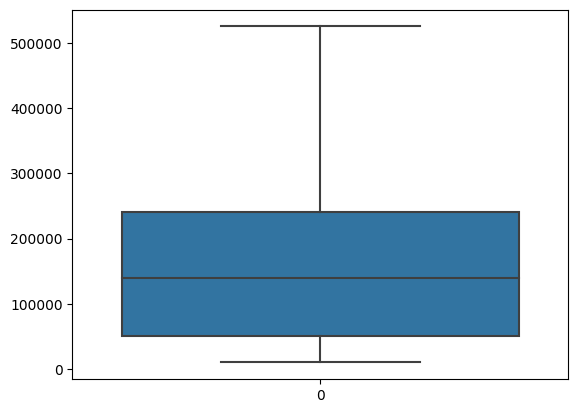

In [24]:
# Ploting box Plot After Outlier capping
sns.boxplot(CC_DF['LIMIT_BAL'])
plt.show

All Outliers are capped according to the limits

#### Age Column

skewness -  0.7322458687830562


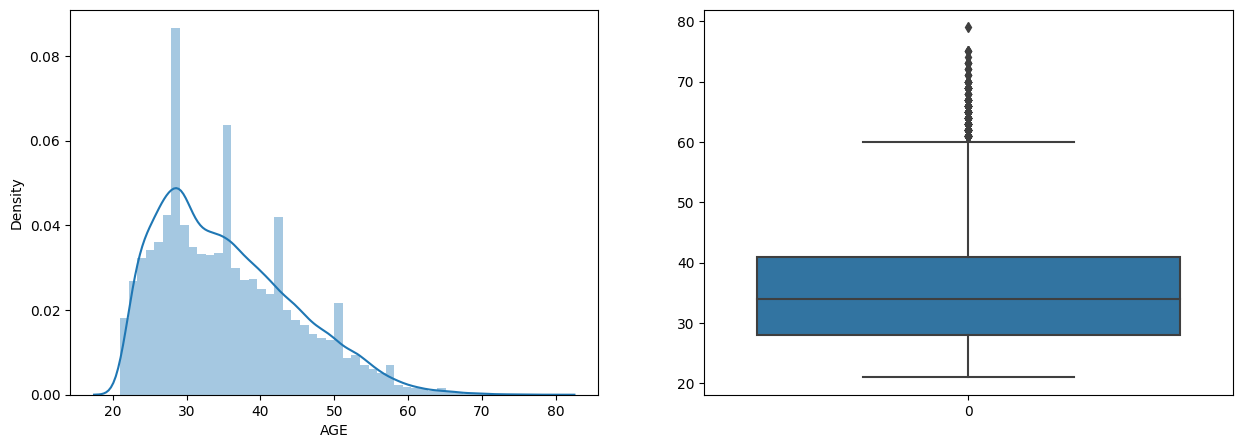

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['AGE'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['AGE'])

plt.show

print('skewness - ',CC_DF['AGE'].skew())

### OBSERVATIONS :
        > Age column is skewed to the left.
        > In box plot we can see there are outliers to be handeled.
        > We will handel the outliers by using quantiles due to the skewed data.
        
        > As we apply quantiles we loss big number of data, So instant of removeing outliers I will capp them at upper_limit

In [26]:
percentile25=CC_DF['AGE'].quantile(0.25) # Calculating 25th Quantile
percentile75=CC_DF['AGE'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  28.0 75th percentile -  41.0
Upper Limit -  60.5 Lower Limit -  8.5


In [27]:
CC_DF['AGE'] = np.where(CC_DF['AGE'] > upper_limit, upper_limit,
                 np.where(CC_DF['AGE'] < lower_limit, lower_limit,CC_DF['AGE']))

<function matplotlib.pyplot.show(close=None, block=None)>

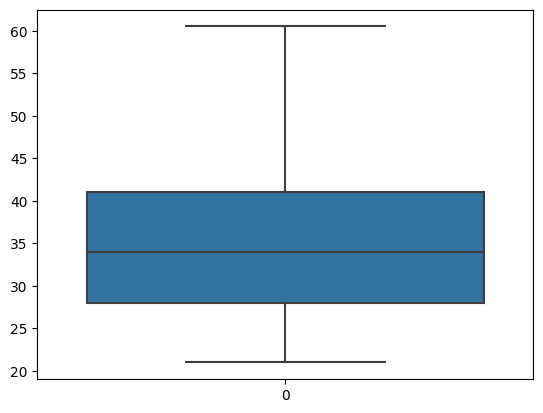

In [28]:
# Ploting box Plot After Outlier capping
sns.boxplot(CC_DF['AGE'])
plt.show

In [29]:
CC_DF['LIMIT_BAL']

0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64

skewness -  0.9045039681490943


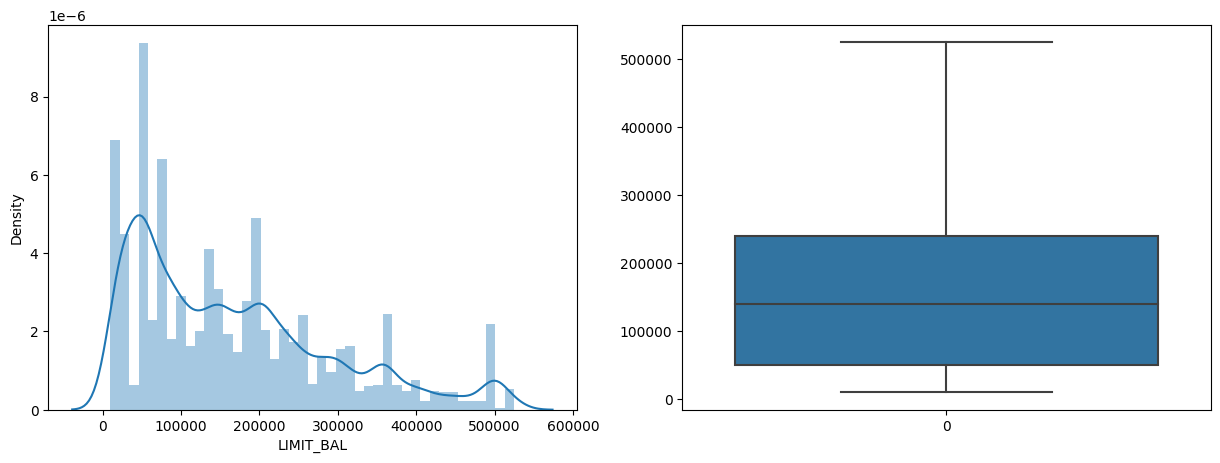

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['LIMIT_BAL'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['LIMIT_BAL'])

plt.show

print('skewness - ',CC_DF['LIMIT_BAL'].skew())

In [31]:
logger.info('HANDALING OUTLIERS ENDS!')

<function matplotlib.pyplot.show(close=None, block=None)>

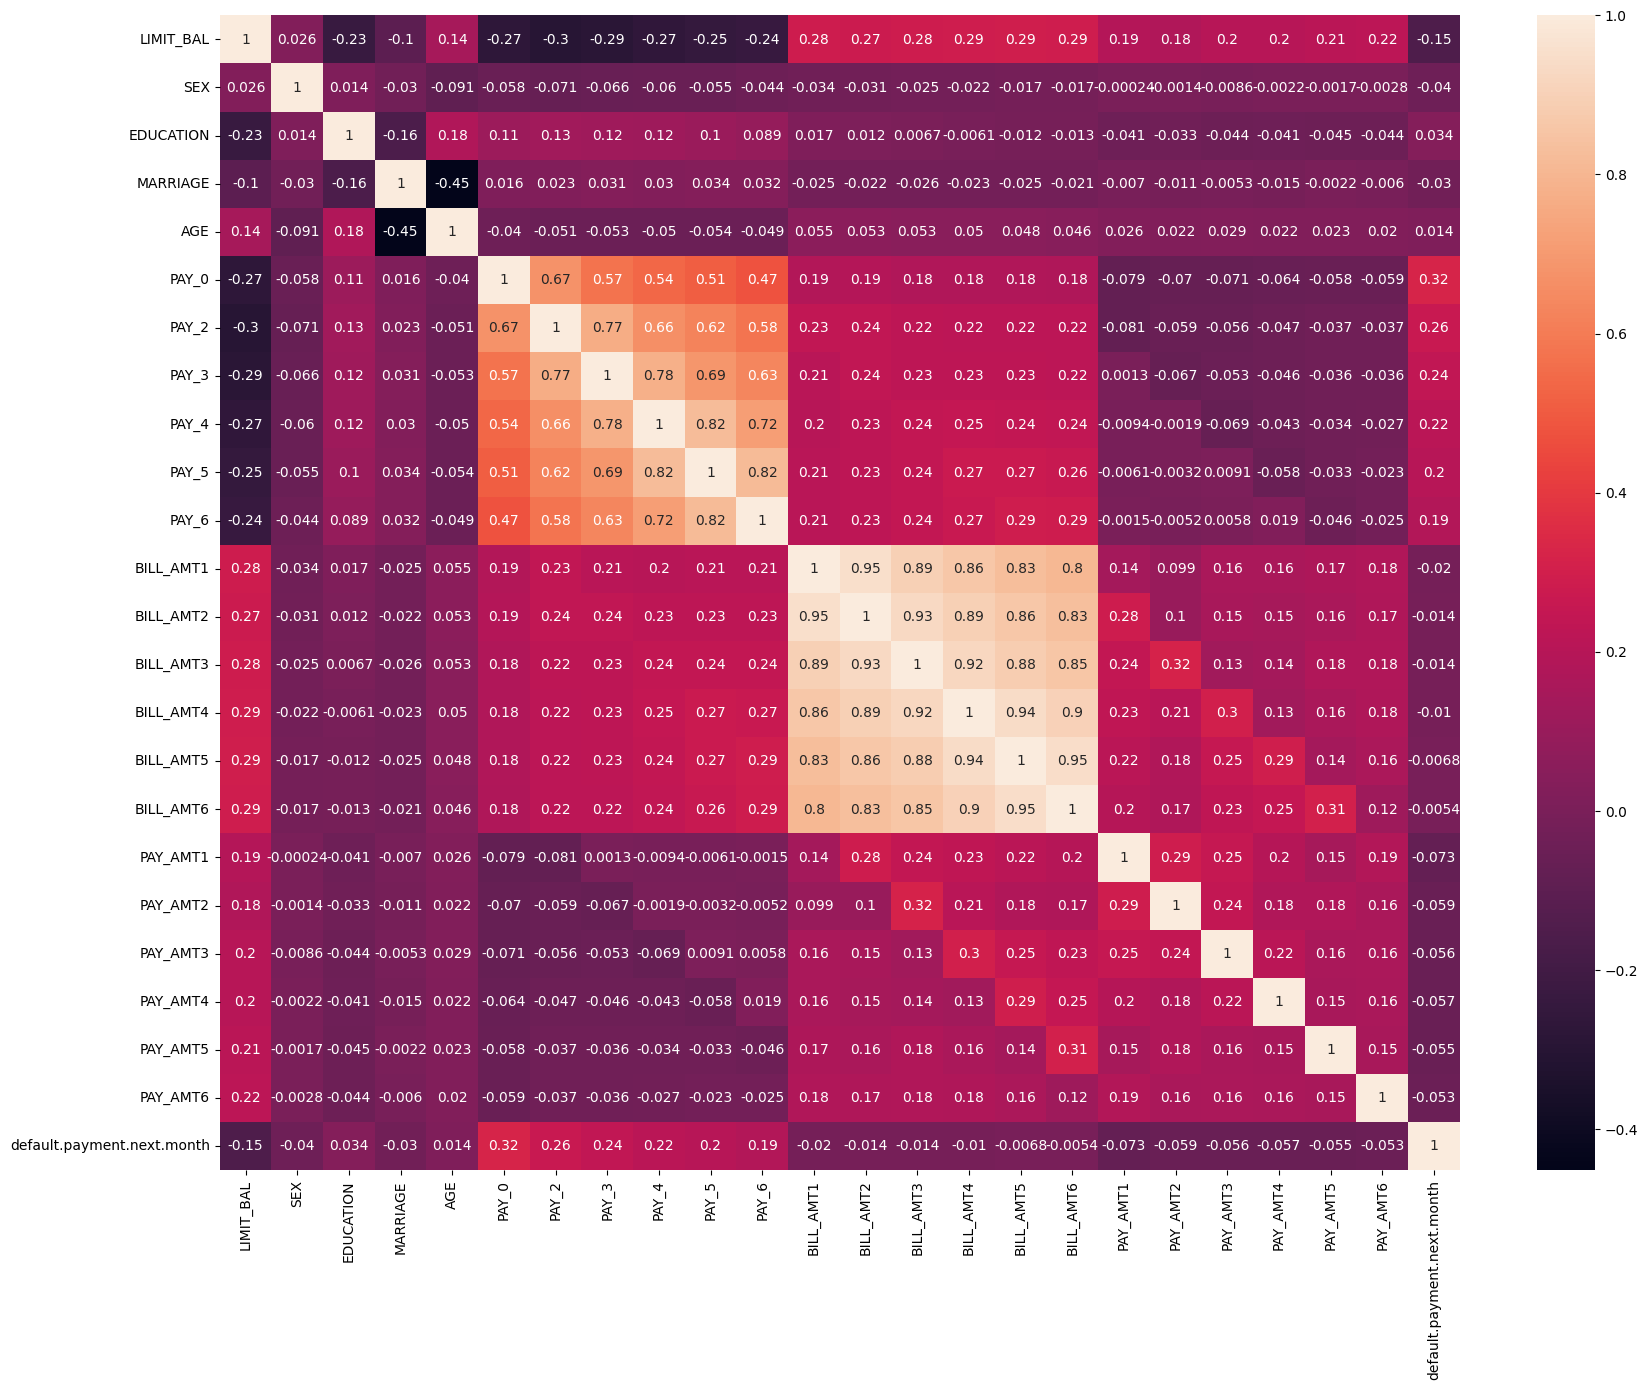

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(CC_DF.corr(),annot=True)
plt.show

In [33]:
logger.info('EDA ENDS!')

## Handeling Imbalnced Data

In [34]:
logger.info('HANDALING IMBALENCED DATA STARTS!')

In [35]:
print('Non Defaulter count - ',CC_DF['default.payment.next.month'].value_counts()[0])
print('Non Defaulter Precent - ',((CC_DF['default.payment.next.month'].value_counts()[0])/len(CC_DF))*100,' %')
print('Defaulter count - ',CC_DF['default.payment.next.month'].value_counts()[1])
print('Defaulter Precent - ',((CC_DF['default.payment.next.month'].value_counts()[1])/len(CC_DF))*100,' %')

Non Defaulter count -  23364
Non Defaulter Precent -  77.88000000000001  %
Defaulter count -  6636
Defaulter Precent -  22.12  %


<Axes: xlabel='default.payment.next.month', ylabel='count'>

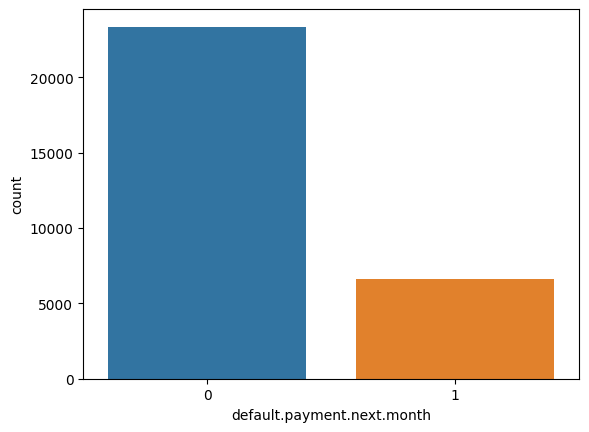

In [36]:
sns.countplot(x=CC_DF['default.payment.next.month'])

    > We can see it is an imbalance data set with 22% Defaulters and 78% Non-Defaulters
    > To handel this we have to use Under or Over Sampling

## Over Sampling

In [37]:
logger.info('HANDALING IMBALENCED DATA - OVER SAMPLEING STARTS!')

In [38]:
# Initialise SMOTE object
smote = SMOTE()

In [39]:
# Separate independent and dependent variables
X = CC_DF.drop('default.payment.next.month',axis=1)
y = CC_DF['default.payment.next.month']

In [40]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [41]:
# Combine balanced X and y
CC_DF_final = pd.DataFrame(x_smote, columns=CC_DF.columns[:-1])
CC_DF_final['default'] = y_smote

CC_DF_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [42]:
logger.info('HANDALING IMBALENCED DATA - OVER SAMPLEING ENDS!')

<Axes: xlabel='default', ylabel='count'>

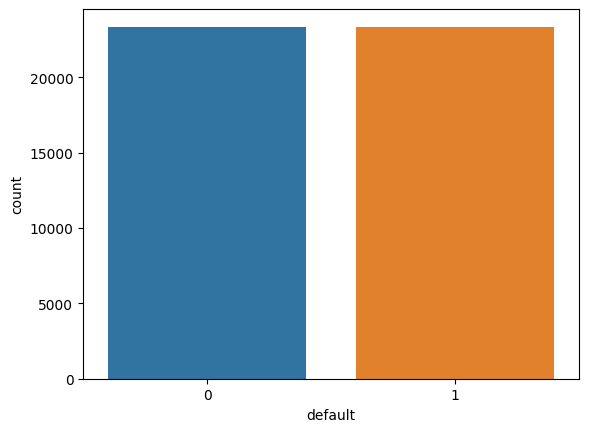

In [43]:
sns.countplot(x=CC_DF_final['default'])

Now data set is balanced

In [44]:
logger.info('HANDALING IMBALENCED DATA ENDS!')

## Splitting

In [45]:
logger.info('DATA PREPARING FOR MODELING STARTS!')

In [46]:
X = CC_DF_final.drop('default',axis=1)
y = CC_DF_final['default']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [48]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
37126,246093.621268,1,1,1,29.437449,0,0,0,0,0,...,141228.532317,144351.994407,150120.861988,150682.961527,7670.571963,3704.659294,5929.600299,8642.810060,3749.159706,5548.012857
4990,20000.000000,1,1,2,32.000000,0,0,0,3,2,...,17575.000000,17063.000000,15711.000000,28600.000000,3276.000000,3000.000000,3.000000,7.000000,2058.000000,669.000000
7273,180000.000000,2,2,1,32.000000,0,0,0,0,-2,...,17987.000000,-99.000000,-99.000000,-99.000000,5000.000000,15000.000000,0.000000,0.000000,0.000000,13550.000000
15568,100000.000000,1,2,2,40.000000,0,0,0,0,0,...,60737.000000,66077.000000,68990.000000,70724.000000,15037.000000,5003.000000,8058.000000,8000.000000,3000.000000,5000.000000
45464,100000.000000,1,1,1,31.478615,1,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,623.395152,0.000000,0.000000,0.000000,0.000000,623.395152,412.464406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,190000.000000,1,2,1,48.000000,0,-1,0,0,0,...,189018.000000,175871.000000,157218.000000,151618.000000,189717.000000,7779.000000,6092.000000,5018.000000,6168.000000,1218.000000
45891,50000.000000,2,2,1,36.441422,0,0,0,0,0,...,40557.528138,41925.473264,30895.934239,27708.867331,1883.254574,1117.967120,2334.133133,869.529982,1365.235009,807.420698
42613,30000.000000,1,1,2,36.058944,1,2,0,0,0,...,26040.371522,26570.086717,27123.834149,27771.962665,0.000000,1411.883176,962.479418,986.197733,1099.014736,755.909174
43567,34583.123707,1,2,1,29.979030,0,1,0,0,1,...,58761.649393,28611.168078,27565.129137,27572.090216,366.649897,2004.124811,23469.048718,1000.000000,1114.578093,229.156185


### Scaling the data

In [49]:
scaler = StandardScaler()

In [50]:
X_train_scaled = scaler.fit_transform(X_train)

In [51]:
logger.info('DATA PREPARING FOR MODELING ENDS!')

## Model Building 

In [52]:
logger.info('MODELING STARTS!')

In [53]:
# Helper Function for printing Accuracy matrices, plotting Confusiuon matrix and ROC curve

def helper(model,X_train,y_train,X_test,y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(train_pred, y_train)
    test_acc = accuracy_score(test_pred, y_test)
    prec = precision_score(y_test, test_pred)
    recc = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    acc_matrices = {'Train accuracy':train_acc,'Test accuracy':test_acc,'Precision':prec,'Recall':recc,'F1 Score':f1}

    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, y_train))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, y_test))

    print('\n========================================================')
    # Plotting Confusion Matrix and ROC curve
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(test_pred, y_test)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
                xticklabels = ['Non-default', 'Default'], 
                yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(test_pred, y_test)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()
    return acc_matrices

### 1. Logistic Regression

In [54]:
logger.info('MODEL - LOGISTIC REGRESSION STARTS!')

In [55]:
LogR = LogisticRegression()

In [56]:
LogR.fit(X_train_scaled,y_train)

LogisticRegression()

In [57]:
X_test_scaled = scaler.transform(X_test)


Training Accuracy Score:  0.7230782400273925
Testing Accuracy Score:  0.7158876904639616
Precision on test data:  0.7195704057279236
Recall on test data:  0.716030534351145
F1 score on test data:  0.7177961057733185

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.73      0.72      0.73     17740
           1       0.72      0.72      0.72     17306

    accuracy                           0.72     35046
   macro avg       0.72      0.72      0.72     35046
weighted avg       0.72      0.72      0.72     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      5816
           1       0.72      0.72      0.72      5866

    accuracy                           0.72     11682
   macro avg       0.72      0.72      0.72     11682
weighted avg       0.72      0.72      0.72     11682




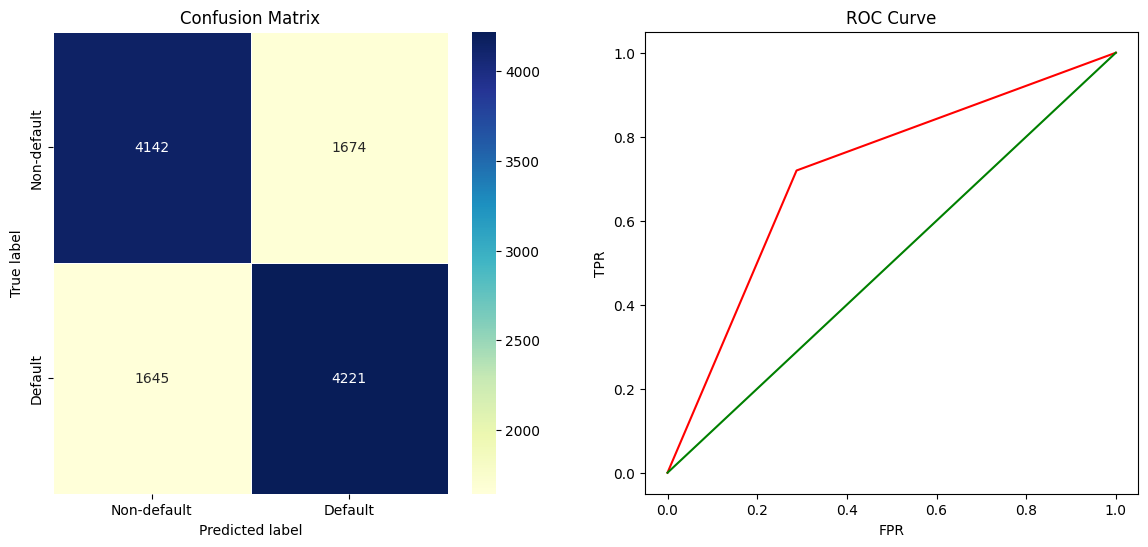

{'Train accuracy': 0.7230782400273925,
 'Test accuracy': 0.7158876904639616,
 'Precision': 0.7195704057279236,
 'Recall': 0.716030534351145,
 'F1 Score': 0.7177961057733185}

In [58]:
helper(LogR,X_train_scaled,y_train,X_test_scaled, y_test)

In [59]:
logger.info('MODEL - LOGISTIC REGRESSION ENDS!')

### 2. Decicion Tree

In [60]:
logger.info('MODEL - DECICION TREE STARTS!')

In [61]:
D_tree = DecisionTreeClassifier()

In [62]:
D_tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()


Training Accuracy Score:  0.9996290589510929
Testing Accuracy Score:  0.758602978941962
Precision on test data:  0.7534201417504532
Recall on test data:  0.7754028837998304
F1 score on test data:  0.7642534693195117

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17586
           1       1.00      1.00      1.00     17460

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      5615
           1       0.78      0.75      0.76      6067

    accuracy                           0.76     11682
   macro avg       0.76      0.76      0.76     11682
weighted avg       0.76      0.76      0.76     11682




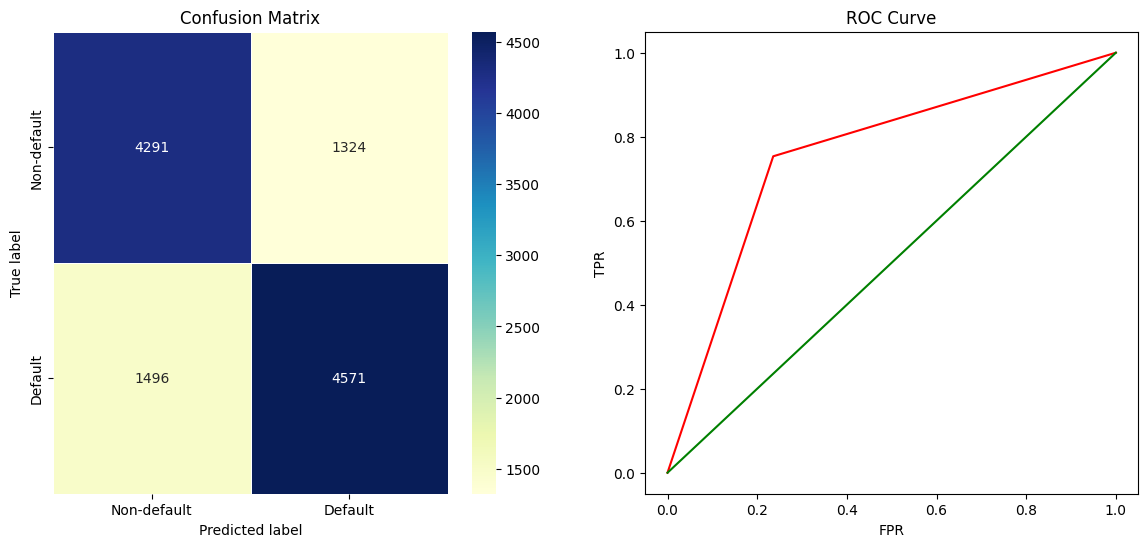

{'Train accuracy': 0.9996290589510929,
 'Test accuracy': 0.758602978941962,
 'Precision': 0.7534201417504532,
 'Recall': 0.7754028837998304,
 'F1 Score': 0.7642534693195117}

In [63]:
helper(D_tree,X_train_scaled,y_train,X_test_scaled,y_test)

In [64]:
logger.info('MODEL - DECICION TREE ENDS!')

### 3. Random Forest

In [65]:
logger.info('MODEL - RANDOM FOREST STARTS!')

In [66]:
RF = RandomForestClassifier()

In [67]:
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9996290589510929
Testing Accuracy Score:  0.8426639274096901
Precision on test data:  0.8589630153955052
Recall on test data:  0.823409669211196
F1 score on test data:  0.8408106703620302

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17576
           1       1.00      1.00      1.00     17470

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      6031
           1       0.82      0.86      0.84      5651

    accuracy                           0.84     11682
   macro avg       0.84      0.84      0.84     11682
weighted avg       0.84      0.84      0.84     11682




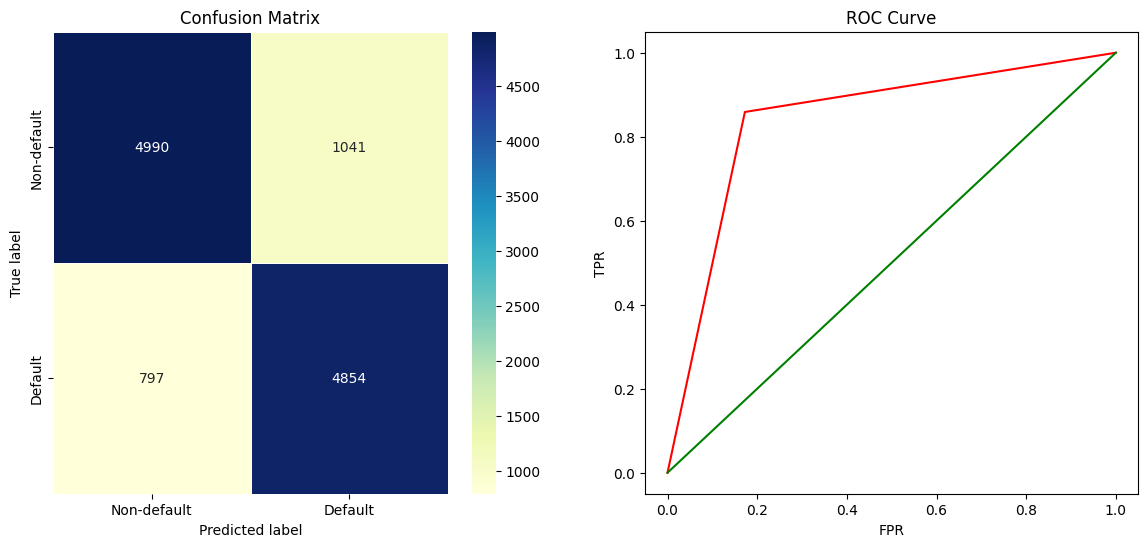

{'Train accuracy': 0.9996290589510929,
 'Test accuracy': 0.8426639274096901,
 'Precision': 0.8589630153955052,
 'Recall': 0.823409669211196,
 'F1 Score': 0.8408106703620302}

In [68]:
helper(RF,X_train_scaled,y_train,X_test_scaled,y_test)

In [69]:
logger.info('MODEL - RANDOM FOREST ENDS!')

### 4. Support Vector Machine

In [70]:
logger.info('MODEL - SUPPORT VECTOR MACHINE STARTS!')

In [71]:
svm = SVC()

In [72]:
svm.fit(X_train_scaled,y_train)

SVC()


Training Accuracy Score:  0.7732408834103749
Testing Accuracy Score:  0.7573189522342064
Precision on test data:  0.77577505407354
Recall on test data:  0.7301102629346904
F1 score on test data:  0.7522502840164291

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     18592
           1       0.74      0.79      0.77     16454

    accuracy                           0.77     35046
   macro avg       0.77      0.77      0.77     35046
weighted avg       0.77      0.77      0.77     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      6134
           1       0.73      0.78      0.75      5548

    accuracy                           0.76     11682
   macro avg       0.76      0.76      0.76     11682
weighted avg       0.76      0.76      0.76     11682




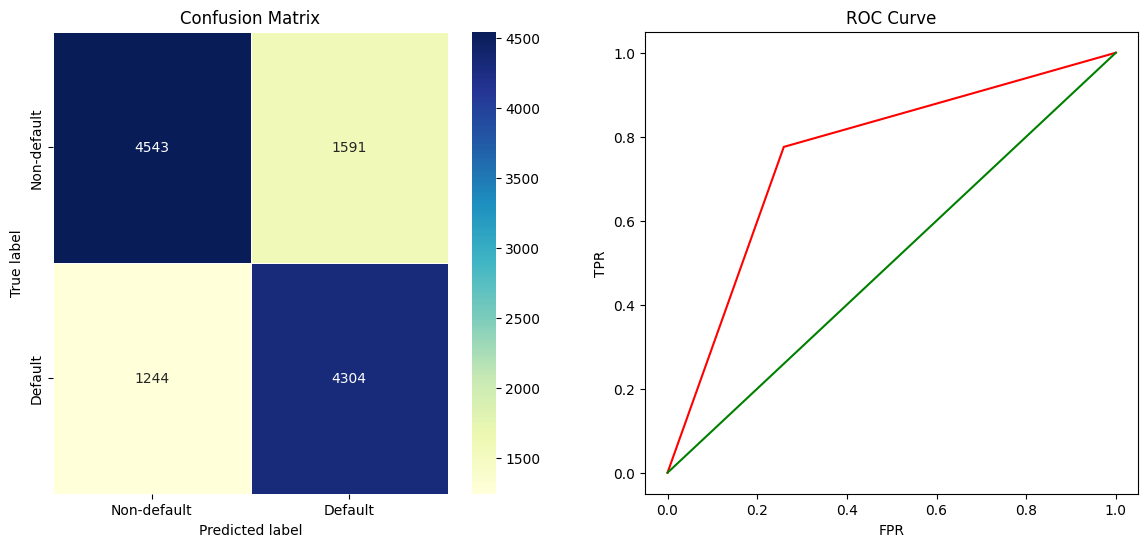

{'Train accuracy': 0.7732408834103749,
 'Test accuracy': 0.7573189522342064,
 'Precision': 0.77577505407354,
 'Recall': 0.7301102629346904,
 'F1 Score': 0.7522502840164291}

In [73]:
helper(svm,X_train_scaled,y_train,X_test_scaled,y_test)

In [74]:
logger.info('MODEL - SUPPORT VECTOR MACHINE ENDS!')

In [75]:
model={'Logistic Regression':{'Train accuracy': 0.7238201221252069,
 'Test accuracy': 0.714261256634138,
 'Precision': 0.7172472387425658,
 'Recall': 0.716030534351145,
 'F1 Score': 0.7166383701188456},'Decicion Tree':{'Train accuracy': 0.9996290589510929,
 'Test accuracy': 0.7574045540147235,
 'Precision': 0.7573566504119724,
 'Recall': 0.7640373197625105,
 'F1 Score': 0.7606823171761525},'Random Forest':{'Train accuracy': 0.9995719910974148,
 'Test accuracy': 0.8413799007019346,
 'Precision': 0.8594806118818926,
 'Recall': 0.8196776929601357,
 'F1 Score': 0.8391074064426501},'SVC':{'Train accuracy': 0.7722136620441705,
 'Test accuracy': 0.7546652970381784,
 'Precision': 0.7730304669190553,
 'Recall': 0.7273960983884648,
 'F1 Score': 0.7495193148051039}}

In [76]:
model=pd.DataFrame(model)

In [77]:
model

,Logistic Regression,Decicion Tree,Random Forest,SVC
Train accuracy,0.723820,0.999629,0.999572,0.772214
Test accuracy,0.714261,0.757405,0.841380,0.754665
Precision,0.717247,0.757357,0.859481,0.773030
Recall,0.716031,0.764037,0.819678,0.727396
F1 Score,0.716638,0.760682,0.839107,0.749519


    All model Accuracy was good but Decicion Tree and Random Forest was to good
    Decicion Tree vs Random Frorest
        > Both training accuracy was good but Random Forest test accuracy was also high
        > F1 Score is also high for Random Forest 
        > So i will go with Random Forest

In [78]:
logger.info('MODELING ENDS!')

## Feature Engineering

In [79]:
logger.info('FEATURE ENGINEERING STARTS!')

In [80]:
CC_DF_FE = CC_DF_final.copy()

In [81]:
CC_DF_FE

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.000000,2,2,1,24.000000,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.000000,2,2,2,26.000000,-1,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.000000,2,2,2,34.000000,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.000000,2,2,1,37.000000,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.000000,1,2,1,57.000000,-1,0,-1,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,80000.000000,1,2,1,46.914976,0,0,2,0,0,...,78036.726595,78309.409572,78867.874408,5029.483214,2984.995820,2999.499861,3016.779675,2984.995820,4990.497353,1
46724,30000.000000,1,1,1,43.378500,0,0,0,0,0,...,27847.025294,28883.940384,28931.642257,1745.192412,1699.926361,1382.625121,1417.142740,659.304402,550.468865,1
46725,151704.379634,1,1,1,29.266971,-1,0,0,-1,-1,...,2997.434286,58307.923051,11161.536966,606.409849,3644.219886,2653.768955,58307.923051,2742.726638,1027.951271,1
46726,221028.292184,2,2,1,52.845756,1,0,0,0,0,...,214659.634721,210857.829964,210695.712578,8573.600155,8153.985340,8000.411317,7814.077263,8241.403421,6695.219290,1


In [82]:
CC_DF_FE.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

#### AVG_BILL_AMT (creating new column)

In [83]:
CC_DF_FE['AVG_BILL_AMT']=(CC_DF_FE['BILL_AMT1']+CC_DF_FE['BILL_AMT2']+CC_DF_FE['BILL_AMT3']+CC_DF_FE['BILL_AMT4']+CC_DF_FE['BILL_AMT5']+CC_DF_FE['BILL_AMT6']/6)

#### AVG_PAY_AMT (creating new column)

In [84]:
CC_DF_FE['AVG_PAY_AMT']=(CC_DF_FE['PAY_0']+CC_DF_FE['PAY_2']+CC_DF_FE['PAY_3']+CC_DF_FE['PAY_4']+CC_DF_FE['PAY_5']+CC_DF_FE['PAY_6']/6)

In [85]:
CC_DF_FE.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT,AVG_PAY_AMT
46723,80000.000000,1,2,1,46.914976,0,0,2,0,0,...,78867.874408,5029.483214,2984.995820,2999.499861,3016.779675,2984.995820,4990.497353,1,4.054438e+05,2.000000
46724,30000.000000,1,1,1,43.378500,0,0,0,0,0,...,28931.642257,1745.192412,1699.926361,1382.625121,1417.142740,659.304402,550.468865,1,1.403619e+05,0.000000
46725,151704.379634,1,1,1,29.266971,-1,0,0,-1,-1,...,11161.536966,606.409849,3644.219886,2653.768955,58307.923051,2742.726638,1027.951271,1,8.051596e+04,-3.000000
46726,221028.292184,2,2,1,52.845756,1,0,0,0,0,...,210695.712578,8573.600155,8153.985340,8000.411317,7814.077263,8241.403421,6695.219290,1,1.128579e+06,1.000000
46727,50000.000000,1,1,2,24.201104,0,0,2,2,2,...,34020.024051,2939.668772,2000.000000,0.000000,3159.779181,0.000000,1750.828070,1,1.674540e+05,6.333333


In [86]:
X=CC_DF_FE.drop('default',axis=1)
y=CC_DF_FE['default']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [88]:
X_train_scaled=scaler.fit_transform(X_train)

In [89]:
X_test_scaled=scaler.transform(X_test)

In [90]:
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9995434571705758
Testing Accuracy Score:  0.8407806882383153
Precision on test data:  0.8574787484174353
Recall on test data:  0.8155857560639945
F1 score on test data:  0.8360077587727033

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17495
           1       1.00      1.00      1.00     17551

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6153
           1       0.82      0.86      0.84      5529

    accuracy                           0.84     11682
   macro avg       0.84      0.84      0.84     11682
weighted avg       0.84      0.84      0.84     11682




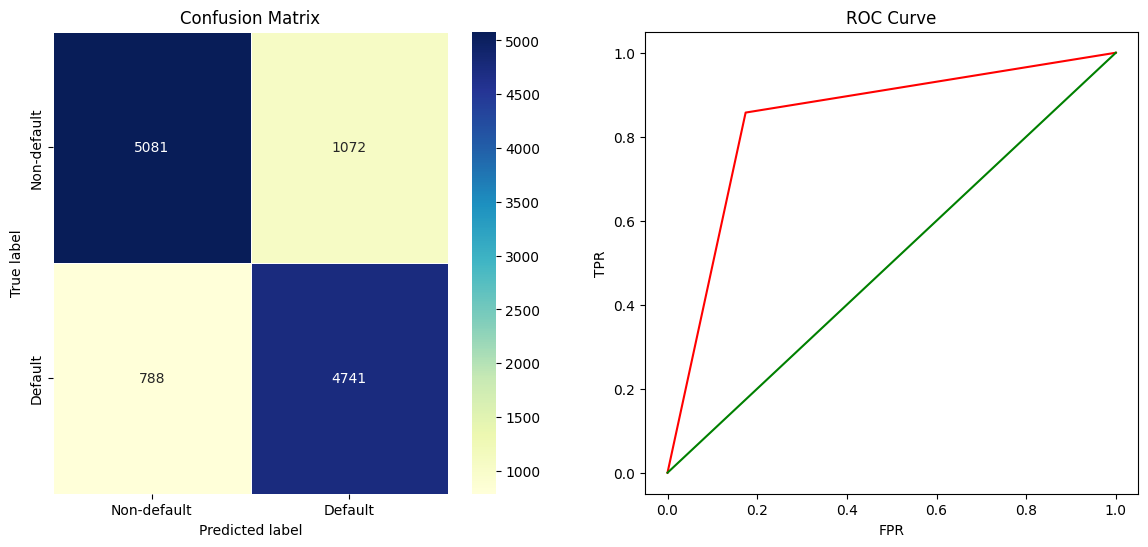

{'Train accuracy': 0.9995434571705758,
 'Test accuracy': 0.8407806882383153,
 'Precision': 0.8574787484174353,
 'Recall': 0.8155857560639945,
 'F1 Score': 0.8360077587727033}

In [91]:
helper(RF,X_train_scaled,y_train,X_test_scaled,y_test)

In [92]:
model['Random Forest with AVG_BILL']=[0.9996290589510929,0.8415511042629686,0.857646229739253,0.8235493148367451,0.8402520065590748]
model['Random Forest with AVG_PAY']=[0.9996861268047709,0.837527820578668,0.8543620598124225,0.8178892088768422,0.8357278864462524]

In [93]:
logger.info('FEATURE ENGINEERING ENDS!')

In [94]:
model.apply(lambda x:x*100)

,Logistic Regression,Decicion Tree,Random Forest,SVC,Random Forest with AVG_BILL,Random Forest with AVG_PAY
Train accuracy,72.382012,99.962906,99.957199,77.221366,99.962906,99.968613
Test accuracy,71.426126,75.740455,84.137990,75.466530,84.155110,83.752782
Precision,71.724724,75.735665,85.948061,77.303047,85.764623,85.436206
Recall,71.603053,76.403732,81.967769,72.739610,82.354931,81.788921
F1 Score,71.663837,76.068232,83.910741,74.951931,84.025201,83.572789


    Feature Enginering
        > After creating new column Average Bill Amount it healped model F1 score.
        > Average Pay Amount was not helpful it actule draged down the F1 Score to 83.5%
        > So I will continue with AVG_BILL and Drop AVG_PAY column

# Final model training with Random Forest and new column AVG_BILL

In [95]:
logger.info('FINAL MODEL BUILDING STARTS!')

In [96]:
CC_DF_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [97]:
CC_DF_final['AVG_BILL_AMT']=(CC_DF_final['BILL_AMT1']+CC_DF_final['BILL_AMT2']+CC_DF_final['BILL_AMT3']+CC_DF_final['BILL_AMT4']+CC_DF_final['BILL_AMT5']+CC_DF_final['BILL_AMT6']/6)

In [98]:
CC_DF_final.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT
46723,80000.000000,1,2,1,46.914976,0,0,2,0,0,...,78309.409572,78867.874408,5029.483214,2984.995820,2999.499861,3016.779675,2984.995820,4990.497353,1,4.054438e+05
46724,30000.000000,1,1,1,43.378500,0,0,0,0,0,...,28883.940384,28931.642257,1745.192412,1699.926361,1382.625121,1417.142740,659.304402,550.468865,1,1.403619e+05
46725,151704.379634,1,1,1,29.266971,-1,0,0,-1,-1,...,58307.923051,11161.536966,606.409849,3644.219886,2653.768955,58307.923051,2742.726638,1027.951271,1,8.051596e+04
46726,221028.292184,2,2,1,52.845756,1,0,0,0,0,...,210857.829964,210695.712578,8573.600155,8153.985340,8000.411317,7814.077263,8241.403421,6695.219290,1,1.128579e+06
46727,50000.000000,1,1,2,24.201104,0,0,2,2,2,...,34726.119083,34020.024051,2939.668772,2000.000000,0.000000,3159.779181,0.000000,1750.828070,1,1.674540e+05


In [99]:
X=CC_DF_final.drop('default',axis=1)
y=CC_DF_final['default']

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [101]:
X_train_scaled=scaler.fit_transform(X_train)

In [102]:
X_test_scaled=scaler.transform(X_test)

In [103]:
RF_F=RandomForestClassifier()

In [104]:
RF_F.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9996005250242538
Testing Accuracy Score:  0.8436055469953775
Precision on test data:  0.8621794871794872
Recall on test data:  0.8213740458015267
F1 score on test data:  0.8412822517591869

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17573
           1       1.00      1.00      1.00     17473

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6066
           1       0.82      0.86      0.84      5616

    accuracy                           0.84     11682
   macro avg       0.84      0.84      0.84     11682
weighted avg       0.84      0.84      0.84     11682




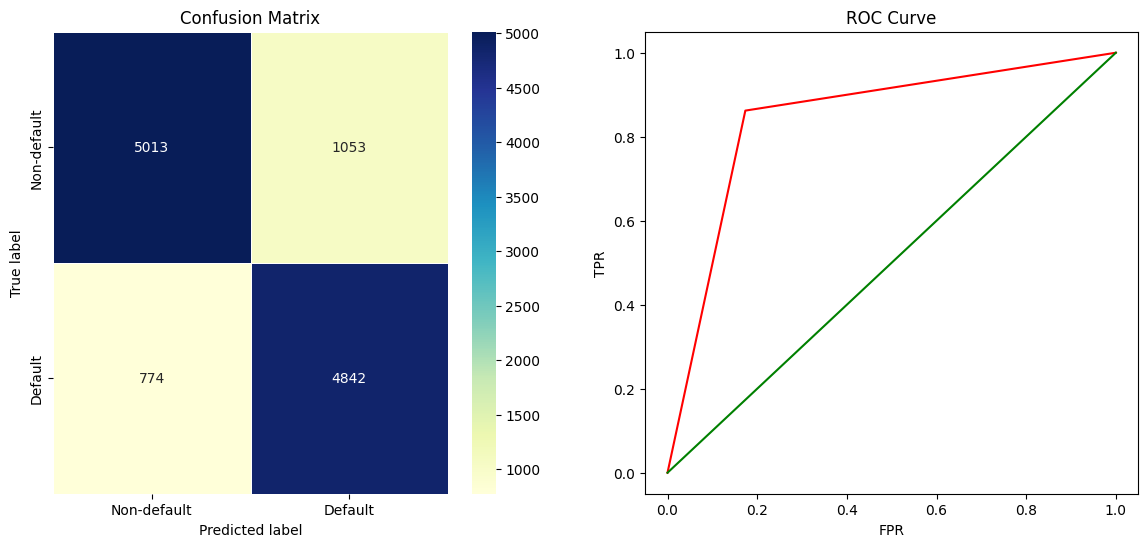

{'Train accuracy': 0.9996005250242538,
 'Test accuracy': 0.8436055469953775,
 'Precision': 0.8621794871794872,
 'Recall': 0.8213740458015267,
 'F1 Score': 0.8412822517591869}

In [105]:
helper(RF_F,X_train_scaled,y_train,X_test_scaled,y_test)

In [106]:
fin_m=({'Scores':{'Train accuracy': 0.9996290589510929,
 'Test accuracy': 0.8425783256291731,
 'Precision': 0.859192348565356,
 'Recall': 0.8229007633587786,
 'F1 Score': 0.8406550558877048}})
final_model= pd.DataFrame(fin_m)

In [107]:
final_model

,Scores
F1 Score,0.840655
Precision,0.859192
Recall,0.822901
Test accuracy,0.842578
Train accuracy,0.999629


In [108]:
logger.info(final_model)

In [109]:
logger.info('FINAL MODEL BUILDING ENDS!')

## Saving the file

In [110]:
logger.info('SAVING THE MODEL...')

In [111]:
pickle.dump(RF_F, open('ccdp.pkl', 'wb'))

logger.info('MODEL SAVED!')

In [112]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

#### Compress the model.pkl, to easy the process of deployement

In [113]:
import bz2 as bz2

In [114]:
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)

In [115]:
compressed_pickle('ccdp', RF_F)

In [116]:
logger.info('PROJECT RUNNING ENDS!')